In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import numpy as np
%matplotlib inline

In [56]:
df=pd.read_csv("dataset.csv")

In [57]:
df.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [58]:
df.shape

(22000, 2)

In [59]:
df.isnull().sum()

Text        0
language    0
dtype: int64

In [60]:
df["language"].value_counts()

language
Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: count, dtype: int64

C:\Users\rajma\AppData\Local\Temp\ipykernel_24260\1061503432.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="language",data=df,palette="tab10")


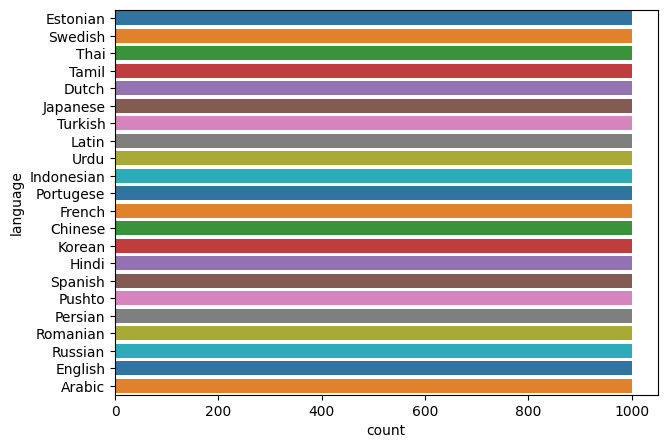

In [61]:
plt.figure(figsize=(7,5))
sns.countplot(y="language",data=df,palette="tab10")
plt.show()

In [62]:
df = df.drop_duplicates(subset='Text')
df = df.reset_index(drop=True)

C:\Users\rajma\AppData\Local\Temp\ipykernel_24260\1061503432.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="language",data=df,palette="tab10")


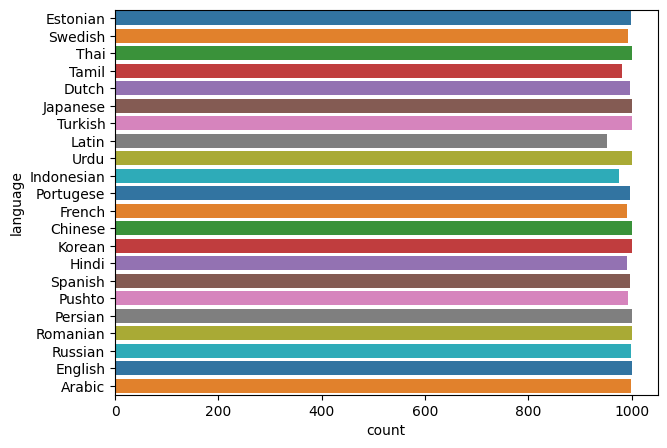

In [63]:
plt.figure(figsize=(7,5))
sns.countplot(y="language",data=df,palette="tab10")
plt.show()

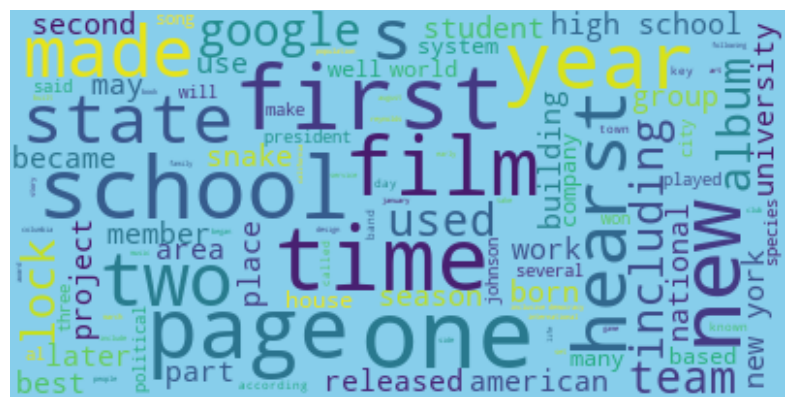

In [64]:
english_text_df = df[df['language'] == 'English']
stopwords = set(STOPWORDS)
text2 = "  ".join(review for review in english_text_df['Text'])  
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="skyblue", stopwords=stopwords).generate(text2)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

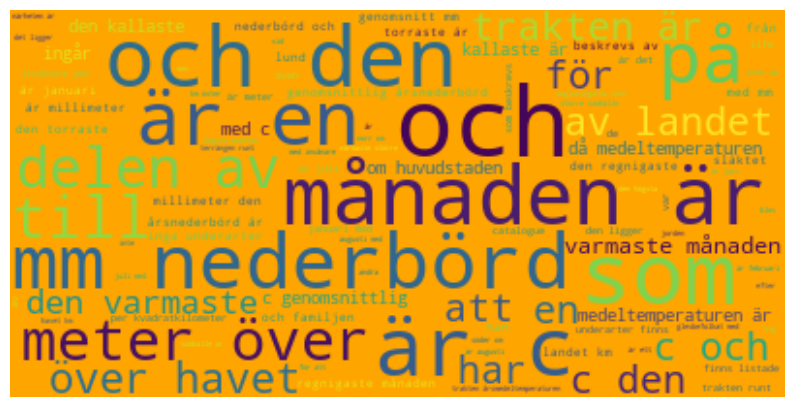

In [65]:
swedish_text_df = df[df['language'] == 'Swedish']
text2 = "  ".join(review for review in swedish_text_df['Text'])  # Assuming 'text' is the column containing the Swedish text
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="orange", stopwords=stopwords).generate(text2)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


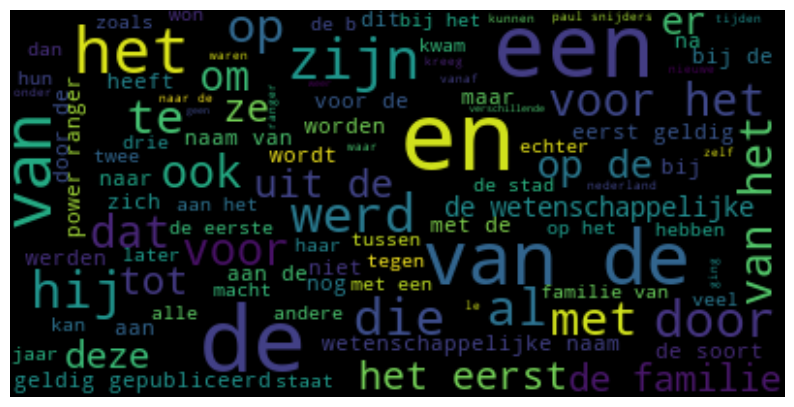

In [66]:
dutch_text_df = df[df['language'] == 'Dutch']
text2 = "  ".join(review for review in dutch_text_df['Text'])  
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black", stopwords=stopwords).generate(text2)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



In [67]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["language"]=le.fit_transform(df["language"])

In [68]:
df["language"].unique()

array([ 4, 17, 19, 18,  2,  8, 20, 10, 21,  7, 12,  5,  1,  9,  6, 16, 13,
       11, 14, 15,  3,  0])

In [69]:
# decoded_languages = le.inverse_transform(df["language"])
# df["decoded_language"] = decoded_languages

# print(df[["decoded_language", "language"]])


In [70]:
decoded_languages = le.inverse_transform(df["language"])
df["decoded_language"] = decoded_languages
unique_decoded_languages = sorted(df["decoded_language"].unique())
unique_languages = sorted(df["language"].unique())

print("======================================================================================================================")
print("Unique Decoded Languages (Ascending Order):", unique_decoded_languages)
print("======================================================================================================================")
print("Unique Languages (Ascending Order):", unique_languages)
print("======================================================================================================================")

Unique Decoded Languages (Ascending Order): ['Arabic', 'Chinese', 'Dutch', 'English', 'Estonian', 'French', 'Hindi', 'Indonesian', 'Japanese', 'Korean', 'Latin', 'Persian', 'Portugese', 'Pushto', 'Romanian', 'Russian', 'Spanish', 'Swedish', 'Tamil', 'Thai', 'Turkish', 'Urdu']
Unique Languages (Ascending Order): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


In [71]:
df.head()

,Text,language,decoded_language
0,klement gottwaldi surnukeha palsameeriti ning ...,4,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,17,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,19,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,18,Tamil
4,de spons behoort tot het geslacht haliclona en...,2,Dutch


In [72]:
total_length = sum(len(text) for text in df["Text"])
num_texts = len(df["Text"])
average_length = total_length / num_texts
print("Average text length:", average_length)

Average text length: 356.76632050871495


# Data Cleaning

In [73]:
from nltk.corpus import stopwords
import re
import unicodedata


def clean_text(text):

    # Remove URL addresses
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Remove accented characters
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

    # Remove punctuation
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)

    # Remove irrelevant characters
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    text = ' '.join(filtered_words)

    return text

In [74]:
df["Text"] = df["Text"].apply(clean_text)

In [75]:
df.head()

,Text,language,decoded_language
0,klement gottwaldi surnukeha palsameeriti ning ...,4,Estonian
1,sebes joseph pereira thomas pa eng jesuits sin...,17,Swedish
2,thanon charoen krung,19,Thai
3,,18,Tamil
4,de spons behoort tot het geslacht haliclona en...,2,Dutch


In [76]:
X=df["Text"]
Y=df["language"]

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [78]:
tf= TfidfVectorizer()
train_data=tf.fit_transform(X)
print(train_data)

  (0, 43307)	0.15263015029848503
  (0, 121299)	0.15263015029848503
  (0, 75887)	0.13905116474443155
  (0, 45413)	0.15263015029848503
  (0, 112367)	0.13905116474443155
  (0, 43301)	0.15263015029848503
  (0, 74619)	0.22923768231595815
  (0, 164)	0.2157378281560049
  (0, 55030)	0.2681296178123534
  (0, 63284)	0.24362766441999023
  (0, 121298)	0.15263015029848503
  (0, 59181)	0.15263015029848503
  (0, 6236)	0.11021371732262658
  (0, 67320)	0.15263015029848503
  (0, 105442)	0.08297130429700278
  (0, 116789)	0.1340648089061767
  (0, 147)	0.0851438968912264
  (0, 111468)	0.15263015029848503
  (0, 60634)	0.1466213534677978
  (0, 48974)	0.15263015029848503
  (0, 44906)	0.1227702618842477
  (0, 79966)	0.15263015029848503
  (0, 78861)	0.15263015029848503
  (0, 52851)	0.13015043627376727
  (0, 46677)	0.1466213534677978
  :	:
  (21858, 85765)	0.2041228392825015
  (21858, 101919)	0.1903852425884585
  (21858, 101109)	0.1960868603664554
  (21858, 68985)	0.3921737207329108
  (21858, 89690)	0.1859627242

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(train_data,Y,test_size=0.1,random_state=42)

In [80]:
svm= SVC()  
svm.fit(X_train, Y_train)

SVC()

In [107]:
X.shape

(21859,)

In [81]:
y_pred = svm.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 57.23%


![](https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg)

# Confusion matrix

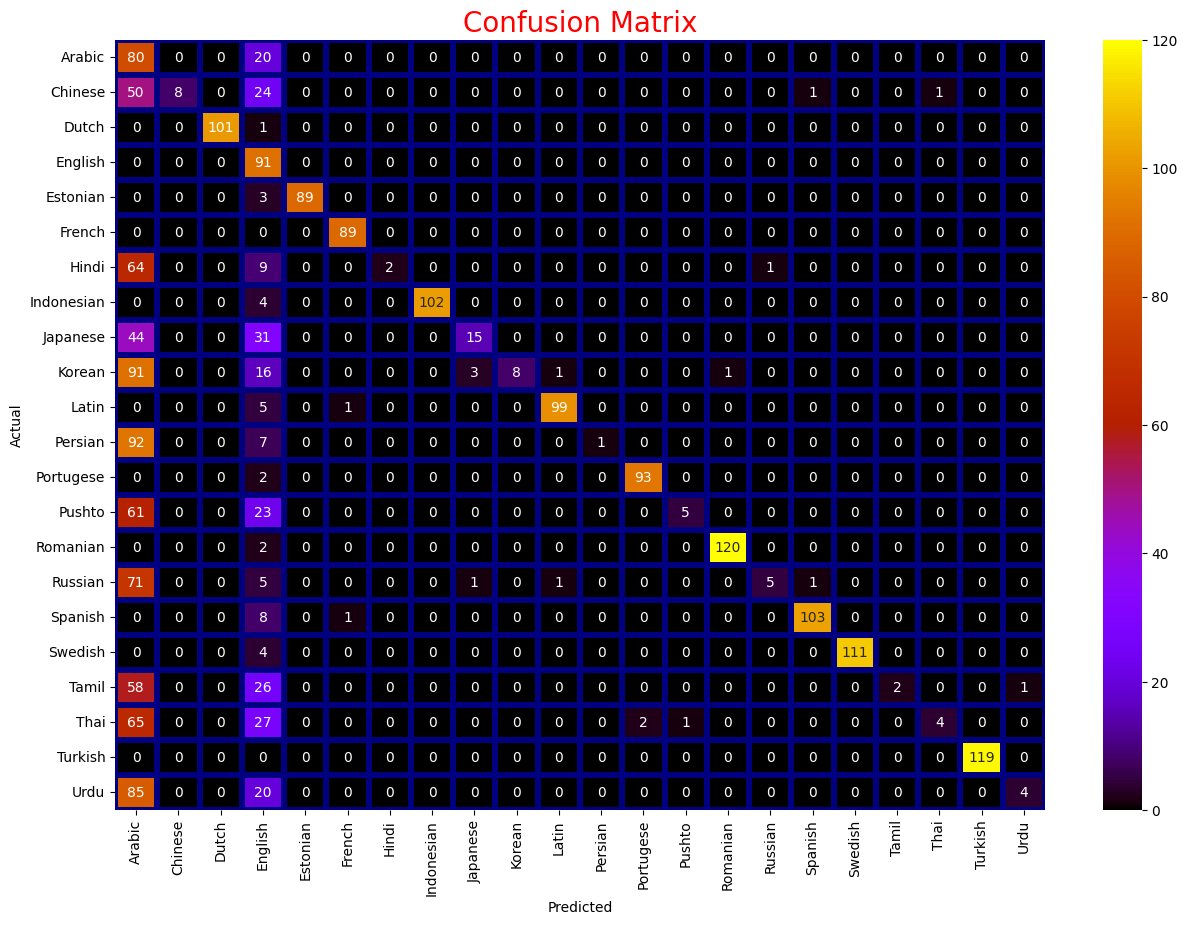

In [82]:
cf=confusion_matrix(Y_test,y_pred)
label_name=unique_decoded_languages
plt.figure(figsize=(15,10))
sns.heatmap(cf,annot=True,fmt="d",xticklabels=label_name,yticklabels=label_name,cmap="gnuplot",
           linewidths=3, linecolor='navy')
plt.title("Confusion Matrix",fontsize=20,color="red")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report

In [83]:
print(classification_report(Y_test,y_pred,target_names=label_name))

              precision    recall  f1-score   support

      Arabic       0.11      0.80      0.19       100
     Chinese       1.00      0.10      0.17        84
       Dutch       1.00      0.99      1.00       102
     English       0.28      1.00      0.43        91
    Estonian       1.00      0.97      0.98        92
      French       0.98      1.00      0.99        89
       Hindi       1.00      0.03      0.05        76
  Indonesian       1.00      0.96      0.98       106
    Japanese       0.79      0.17      0.28        90
      Korean       1.00      0.07      0.12       120
       Latin       0.98      0.94      0.96       105
     Persian       1.00      0.01      0.02       100
   Portugese       0.98      0.98      0.98        95
      Pushto       0.83      0.06      0.11        89
    Romanian       0.99      0.98      0.99       122
     Russian       0.83      0.06      0.11        84
     Spanish       0.98      0.92      0.95       112
     Swedish       1.00    

# Roc Auc

# Naive Bayes

In [84]:
from sklearn.naive_bayes import MultinomialNB

In [85]:
nb= MultinomialNB()
nb.fit(X_train,Y_train)

MultinomialNB()

In [105]:

import joblib
joblib.dump(nb,'saved.pkl')

['saved.pkl']

In [109]:
pred1=nb.predict(X_test[0])
pred1

array([7])

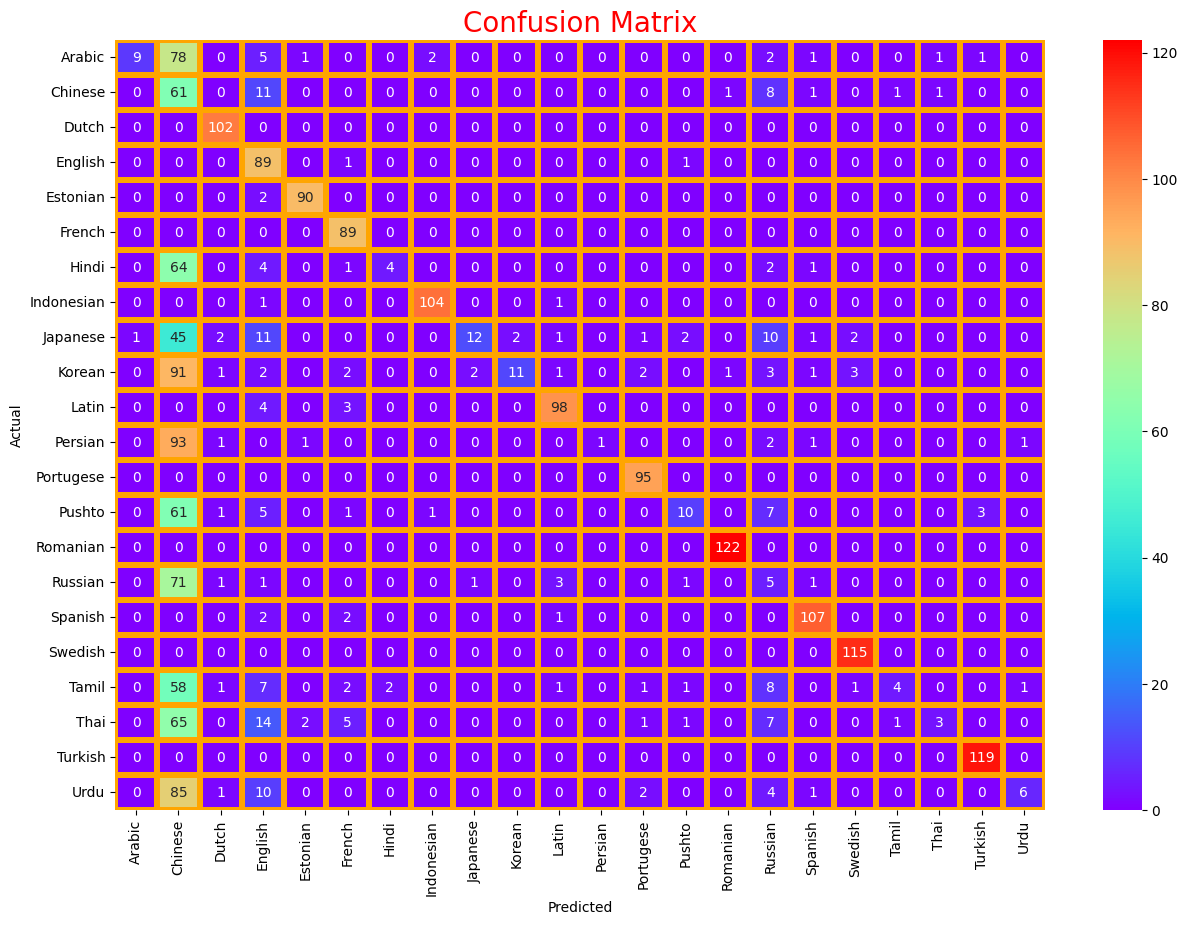

In [87]:
cf0=confusion_matrix(Y_test,pred1)
label_name=unique_decoded_languages
plt.figure(figsize=(15,10))
sns.heatmap(cf0,annot=True,fmt="d",xticklabels=label_name,yticklabels=label_name,cmap="rainbow",
           linewidths=3, linecolor='orange')
plt.title("Confusion Matrix",fontsize=20,color="red")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [88]:
print(classification_report(Y_test,pred1,target_names=label_name))

              precision    recall  f1-score   support

      Arabic       0.90      0.09      0.16       100
     Chinese       0.08      0.73      0.14        84
       Dutch       0.93      1.00      0.96       102
     English       0.53      0.98      0.69        91
    Estonian       0.96      0.98      0.97        92
      French       0.84      1.00      0.91        89
       Hindi       0.67      0.05      0.10        76
  Indonesian       0.97      0.98      0.98       106
    Japanese       0.80      0.13      0.23        90
      Korean       0.85      0.09      0.17       120
       Latin       0.92      0.93      0.93       105
     Persian       1.00      0.01      0.02       100
   Portugese       0.93      1.00      0.96        95
      Pushto       0.62      0.11      0.19        89
    Romanian       0.98      1.00      0.99       122
     Russian       0.09      0.06      0.07        84
     Spanish       0.93      0.96      0.94       112
     Swedish       0.95    

# CountVectorizer

In [89]:
import numpy as np
X_data=df["Text"]
Y_data=df["language"]

In [90]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
new_data=vectorizer.fit_transform(X_data)

In [91]:
x_train,x_test,y_train,y_test=train_test_split(new_data,Y_data,test_size=0.3,random_state=42)

In [92]:
new_svm = SVC()  
new_svm.fit(x_train, y_train)

SVC()

In [93]:
new_pred= new_svm.predict(x_test)
new_accuracy = accuracy_score(y_test,new_pred)
print(f"Accuracy: {new_accuracy * 100:.2f}%")

Accuracy: 51.81%


In [94]:
x_test.shape

(6558, 121515)

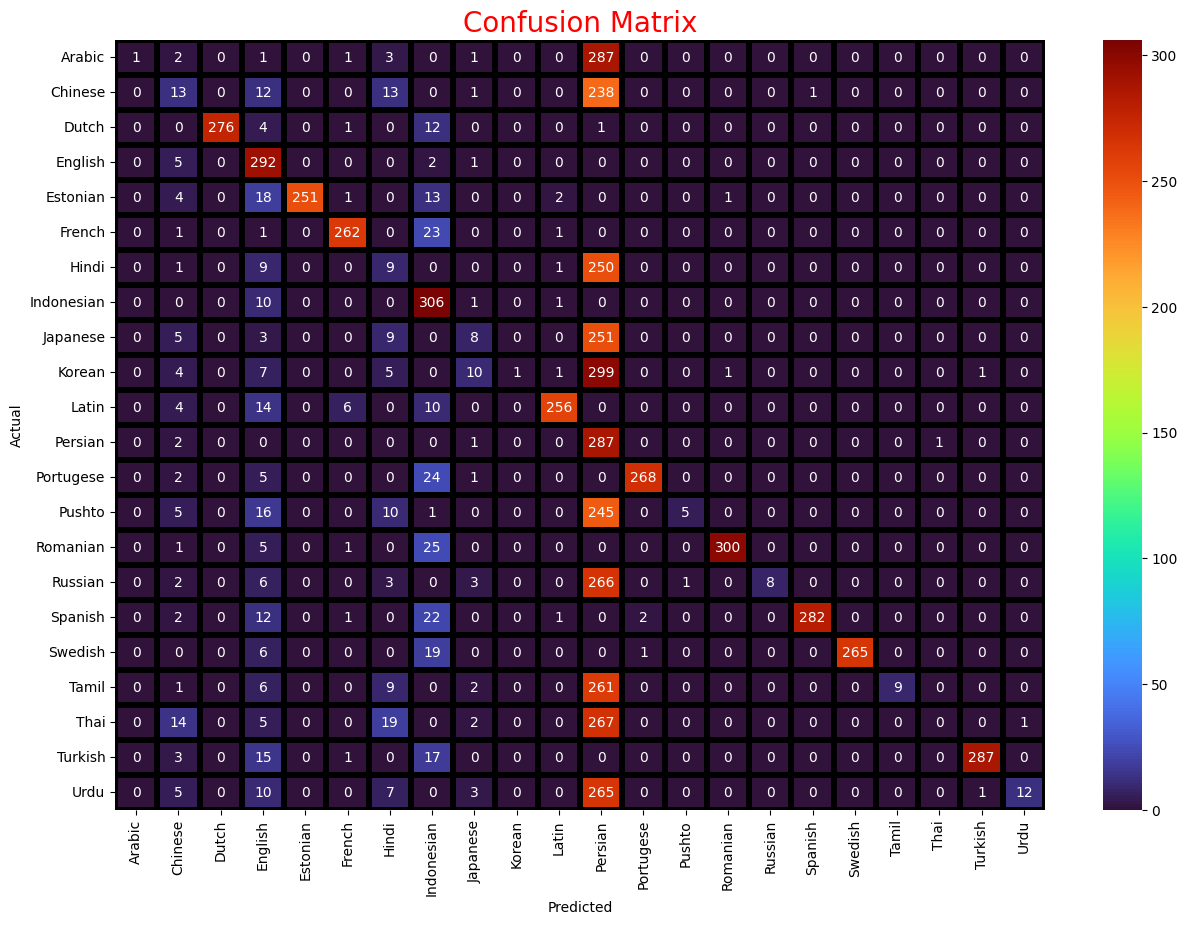

In [95]:
cf2=confusion_matrix(y_test,new_pred)
label_name=unique_decoded_languages
plt.figure(figsize=(15,10))
sns.heatmap(cf2,annot=True,fmt="d",xticklabels=label_name,yticklabels=label_name,cmap="turbo",
           linewidths=3, linecolor='black')
plt.title("Confusion Matrix",fontsize=20,color="red")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [96]:
print(classification_report(y_test,new_pred,target_names=label_name))

              precision    recall  f1-score   support

      Arabic       1.00      0.00      0.01       296
     Chinese       0.17      0.05      0.07       278
       Dutch       1.00      0.94      0.97       294
     English       0.64      0.97      0.77       300
    Estonian       1.00      0.87      0.93       290
      French       0.96      0.91      0.93       288
       Hindi       0.10      0.03      0.05       270
  Indonesian       0.65      0.96      0.77       318
    Japanese       0.24      0.03      0.05       276
      Korean       1.00      0.00      0.01       329
       Latin       0.97      0.88      0.93       290
     Persian       0.10      0.99      0.18       291
   Portugese       0.99      0.89      0.94       300
      Pushto       0.83      0.02      0.03       282
    Romanian       0.99      0.90      0.95       332
     Russian       1.00      0.03      0.05       289
     Spanish       1.00      0.88      0.93       322
     Swedish       1.00    

# naive Bayes+Countvectorizer

In [97]:
new_nb= MultinomialNB()
new_nb.fit(x_train,y_train)

MultinomialNB()

In [98]:
pred3=nb.predict(x_test)
accuracy1 = accuracy_score(y_test,pred3)
print(f"Accuracy: {accuracy1 * 100:.2f}%")

Accuracy: 61.19%


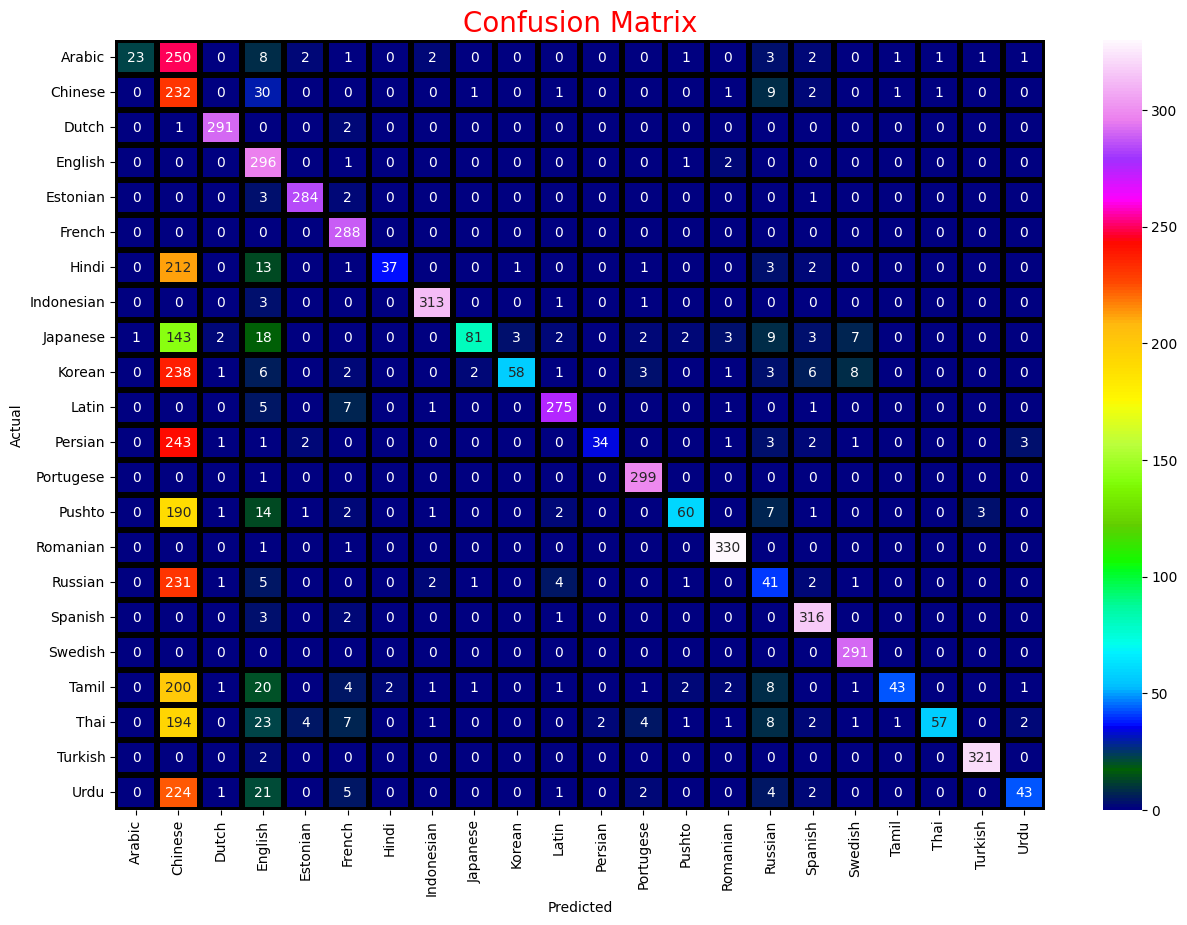

In [99]:
cf4=confusion_matrix(y_test,pred3)
label_name=unique_decoded_languages
plt.figure(figsize=(15,10))
sns.heatmap(cf4,annot=True,fmt="d",xticklabels=label_name,yticklabels=label_name,cmap="gist_ncar",
           linewidths=3, linecolor='black')
plt.title("Confusion Matrix",fontsize=20,color="red")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [100]:
print(classification_report(y_test,pred3,target_names=label_name))

              precision    recall  f1-score   support

      Arabic       0.96      0.08      0.14       296
     Chinese       0.10      0.83      0.18       278
       Dutch       0.97      0.99      0.98       294
     English       0.63      0.99      0.77       300
    Estonian       0.97      0.98      0.97       290
      French       0.89      1.00      0.94       288
       Hindi       0.95      0.14      0.24       270
  Indonesian       0.98      0.98      0.98       318
    Japanese       0.94      0.29      0.45       276
      Korean       0.94      0.18      0.30       329
       Latin       0.95      0.95      0.95       290
     Persian       0.94      0.12      0.21       291
   Portugese       0.96      1.00      0.98       300
      Pushto       0.88      0.21      0.34       282
    Romanian       0.96      0.99      0.98       332
     Russian       0.42      0.14      0.21       289
     Spanish       0.92      0.98      0.95       322
     Swedish       0.94    